In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tikzplotlib

plt.style.use("seaborn-pastel")
plt.rcParams.update({
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),
    "grid.color": "000000",
    "grid.alpha": 0.2
})

In [2]:
def get_categories(dd):
    real_world = dd[dd.index.str.contains("jena")]
    real_world = real_world.append(dd[dd.index.str.contains("gene")])
    real_world = real_world.append(dd[dd.index.str.contains("colors")])
    real_world = real_world.append(dd[dd.index.str.contains("news")])
                                
    random = dd[dd.index.str.contains("action_seq")]
    random = random.append(dd[dd.index.str.contains("strings")])
    
    return real_world, random

In [3]:
def read_file(file_path, raw=False):
    dd = pd.read_csv(file_path)
    dd = dd.set_index("file")
    dd = dd[dd["clusterGraphBefore"] == False]
    if not raw:
        dd = dd[(dd["nodes"] >= 100) & (dd["nodes"] < 5000)]
    
    dd["mergePerc"] = dd["merges"] / dd["nodes"]

    real_world, random = get_categories(dd)
    
    return { "real_world": real_world, "random": random }, dd

In [5]:
results = {}
results_raw = {}
for root, dir, files in os.walk("./"):
    for file in files:
        full = root + file
        if full.endswith(".csv") and not ".ipynb" in full and "out_" in full:
            print(full)
            key = file.replace(".csv", "").replace("out_", "")
            results[key] = read_file(full)
            results_raw[key] = read_file(full, raw=True)

categories, df = results["poly_comps"]

./out_poly_comps.csv
./out_heuristik.csv
./out_ln_comps.csv


# The Dataset

<AxesSubplot:>

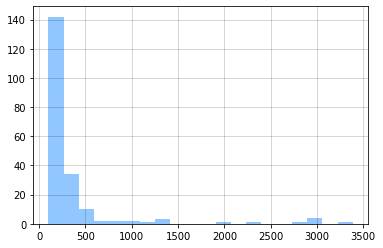

In [6]:
df["nodes"].hist(bins=20)

<AxesSubplot:>

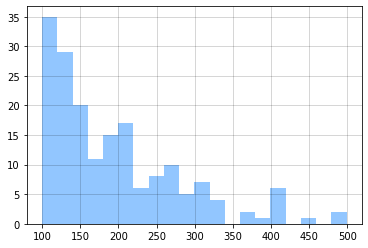

In [7]:
df[df["nodes"] < 500]["nodes"].hist(bins=20)

Schauen wie man das noch besser darstellt. Eventuell, Prozent wie viel vom aktuellen Set entfernt wurden? 

# Fully solved without calculating all minimum cuts

In [8]:
print("Solved Poly: ", results["poly_comps"][1]["fullySolved"].all())

Solved Poly:  True


In [9]:
def get_merge_perc(d):
    return np.around((d["mergePerc"]).describe()["mean"], 3)

'\ntikzplotlib.save(\n    "../../template/raw/figures/merges_perc_plot.tex",\n    axis_width=\'12cm\',\n    axis_height="8cm",\n    extra_axis_parameters=[\n        "y label style={at={(axis description cs:-0.08,.5)},anchor=south}",\n        "yticklabels = {0, 0, 0.05, 0.1, 0.15, 0.2, 0.25}",\n    ]\n)\n'

<Figure size 432x288 with 0 Axes>

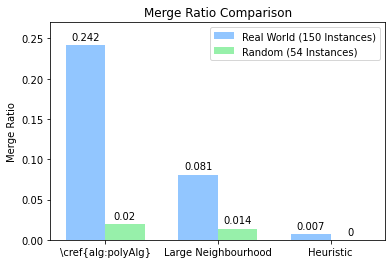

In [13]:
labels = ["\cref{alg:polyAlg}", "Large Neighbourhood",  "Heuristic"]
real_world_i = []
random_i = []

#for key in ["ln_exhaus", "poly_exhaus", "heuristik_new_exhaust"]:
for key in ["poly_comps", "ln_comps",  "heuristik"]:
    real_world_i.append(get_merge_perc(results[key][0]["real_world"]))
    random_i.append(get_merge_perc(results[key][0]["random"]))

tikzplotlib.clean_figure()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, real_world_i, width, label=f"Real World ({len(results[key][0]['real_world'])} Instances)")
rects2 = ax.bar(x + width / 2, random_i, width, label=f"Random ({len(results[key][0]['random'])} Instances)")

ax.set_ylabel("Merge Ratio")
ax.set_title("Merge Ratio Comparison")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_ylim([0, 0.27])

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

"""
tikzplotlib.save(
    "../../template/raw/figures/merges_perc_plot.tex",
    axis_width='12cm',
    axis_height="8cm",
    extra_axis_parameters=[
        "y label style={at={(axis description cs:-0.08,.5)},anchor=south}",
        "yticklabels = {0, 0, 0.05, 0.1, 0.15, 0.2, 0.25}",
    ]
)
"""

(array([83, 24,  9,  4,  2,  2,  2,  0,  1, 23]), array([0.        , 0.09997048, 0.19994095, 0.29991143, 0.3998819 ,
       0.49985238, 0.59982285, 0.69979333, 0.7997638 , 0.89973428,
       0.99970475]))


'\ntikzplotlib.save(\n    "../../template/raw/figures/merge_plot.tex",\n    axis_width=\'12cm\',\n    axis_height="8cm",\n    extra_axis_parameters=[\n        "y label style={at={(axis description cs:-0.05,.5)},anchor=south}",\n        "x label style={at={(axis description cs:0.5,-0.2)},anchor=south}"\n    ]\n)\n'

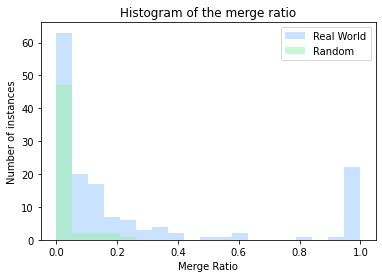

In [14]:
tikzplotlib.clean_figure()

real_world, random = get_categories(df)

plt.title("Histogram of the merge ratio")
axs = plt.gca()

axs.set_ylabel("Number of instances")
axs.set_xlabel("Merge Ratio")

bins = np.linspace(0, 1, 20)

print(np.histogram(real_world["mergePerc"]))

plt.hist(real_world["mergePerc"], bins, alpha=0.5, label='Real World')
plt.hist(random["mergePerc"], bins, alpha=0.5, label='Random')
plt.legend(loc='upper right')

"""
tikzplotlib.save(
    "../../template/raw/figures/merge_plot.tex",
    axis_width='12cm',
    axis_height="8cm",
    extra_axis_parameters=[
        "y label style={at={(axis description cs:-0.05,.5)},anchor=south}",
        "x label style={at={(axis description cs:0.5,-0.2)},anchor=south}"
    ]
)
"""

# Running time

'\ntikzplotlib.save(\n    "../../template/raw/figures/running_time_plot_3.tex",\n    axis_width=\'12cm\',\n    axis_height="8cm",\n    extra_axis_parameters=[\n        "y label style={at={(axis description cs:-0.05,.5)},anchor=south}",\n        "x label style={at={(axis description cs:0.5,-0.2)},anchor=south}",\n        "colorbar style={ y label style={at={(axis description cs:6.5,.5)}, anchor=south,rotate=-90 }}"\n    ]\n)\n'

<Figure size 432x288 with 0 Axes>

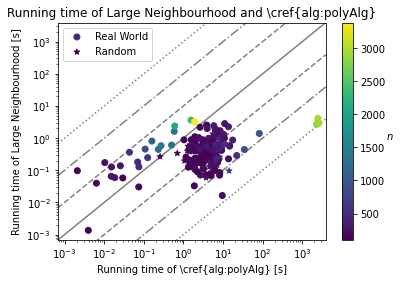

In [16]:
import matplotlib.cm as cm
import matplotlib.lines as mlines

df["timeLN"] = results["ln_comps"][1]["time"]

df_cur = df

tikzplotlib.clean_figure()

fig, axs = plt.subplots()

x = np.arange(len(labels))
width = 0.35

minValue = min(min(df_cur["time"]), min(df_cur["timeLN"]))
maxValue = max(max(df_cur["time"]), max(df_cur["timeLN"]))

min_, max_ = df_cur["nodes"].min(), df_cur["nodes"].max()

minValue = minValue - 0.5 * minValue
maxValue = maxValue + 0.5 * maxValue

axs.set_xlim([minValue, maxValue])
axs.set_ylim([minValue, maxValue])
axs.grid(False)

x = np.arange(minValue, maxValue, 100)
axs.plot(x, x, color="grey")
axs.plot(x, x * 0.1, color="grey", linestyle='dashed')
axs.plot(x, x * 10, color="grey", linestyle='dashed')
axs.plot(x, x * 0.01, color="grey", linestyle='-.')
axs.plot(x, x * 100, color="grey", linestyle='-.')
axs.plot(x, x * 0.001, color="grey", linestyle='dotted')
axs.plot(x, x * 1000, color="grey", linestyle='dotted')

real_world, random = get_categories(df_cur)

s = plt.scatter(real_world["time"], real_world["timeLN"], c=real_world["nodes"], cmap="viridis", label="Real World", zorder=5, marker="o")
plt.clim(min_, max_)

s2 = plt.scatter(random["time"], random["timeLN"], c=random["nodes"], cmap="viridis", label="Random", zorder=5, marker="*")
plt.clim(min_, max_)

cbar = plt.colorbar();
cbar.set_label('$n$', rotation=0)
axs.set_ylabel("Running time of Large Neighbourhood [s]")
axs.set_xlabel("Running time of \cref{alg:polyAlg} [s]")
axs.set_title("Running time of Large Neighbourhood and \cref{alg:polyAlg}")

axs.set_yscale('log')
axs.set_xscale('log')

axs.legend()

"""
tikzplotlib.save(
    "../../template/raw/figures/running_time_plot_3.tex",
    axis_width='12cm',
    axis_height="8cm",
    extra_axis_parameters=[
        "y label style={at={(axis description cs:-0.05,.5)},anchor=south}",
        "x label style={at={(axis description cs:0.5,-0.2)},anchor=south}",
        "colorbar style={ y label style={at={(axis description cs:6.5,.5)}, anchor=south,rotate=-90 }}"
    ]
)
"""

'\ntikzplotlib.save(\n    "../../template/raw/figures/recursion_depth_plot.tex",\n    axis_width=\'12cm\',\n    axis_height="8cm",\n    extra_axis_parameters=[\n        "colorbar style={ y label style={at={(axis description cs:6.5,.5)},anchor=south}}"\n    ]\n)\n'

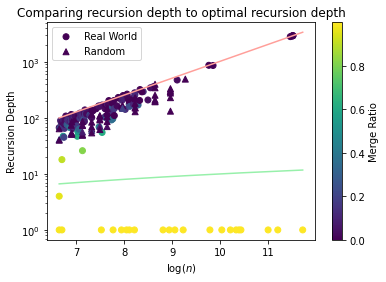

In [17]:
sorted_df = results["poly_comps"][1].sort_values("nodes")
sorted_df["mergePerc"] = sorted_df["merges"] / sorted_df["nodes"]


tikzplotlib.clean_figure()

ax = plt.gca()

min_, max_ = sorted_df["mergePerc"].min(), sorted_df["mergePerc"].max()

real_world, random = get_categories(sorted_df)

x = "nodes"
y = "recursionDepth"

s2 = plt.scatter(np.log2(real_world["nodes"]), real_world["recursionDepth"], c=real_world["mergePerc"], cmap="viridis", marker="o", label="Real World")
plt.clim(min_, max_)

s2 = plt.scatter(np.log2(random["nodes"]), random["recursionDepth"], c=random["mergePerc"], cmap="viridis", marker="^", label="Random")
plt.clim(min_, max_)
                  
plt.plot(np.log2(sorted_df["nodes"]), sorted_df["nodes"], color="#FF9F9A")
plt.plot(np.log2(sorted_df["nodes"]), np.log2(sorted_df["nodes"]), color="#97F0AA")

ax.set_xlabel("$\log(n)$")
ax.set_ylabel("Recursion Depth")
ax.set_title("Comparing recursion depth to optimal recursion depth")

cbar = plt.colorbar(s2);
cbar.set_label('Merge Ratio', rotation=90)

ax.set_yscale("log")


plt.legend()

"""
tikzplotlib.save(
    "../../template/raw/figures/recursion_depth_plot.tex",
    axis_width='12cm',
    axis_height="8cm",
    extra_axis_parameters=[
        "colorbar style={ y label style={at={(axis description cs:6.5,.5)},anchor=south}}"
    ]
)
"""

# Solved completely

[('Poly Time Algorithm', 0.1127), ('Large Neighbourhood', 0.0147), ('Heuristic', 0.0049)]


[Text(0, 3, '0.1127'), Text(0, 3, '0.0147'), Text(0, 3, '0.0049')]

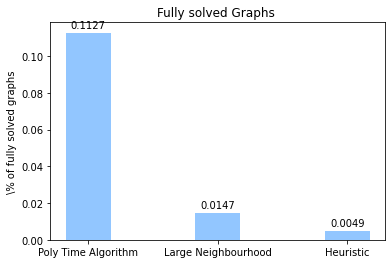

In [23]:
def calc_solved_completely(d):
    return len(d[(d["clusterGraphAfter"] == True)]) / len(d)

labels = ["Poly Time Algorithm", "Large Neighbourhood", "Heuristic"]
values = []
for key in ["poly_comps", "ln_comps", "heuristik"]:
    values.append(round(calc_solved_completely(results[key][1]), 4))

print(list(zip(labels, values)))

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, values, width)

ax.set_ylabel("\% of fully solved graphs")
ax.set_title("Fully solved Graphs ")
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.bar_label(rects1, padding=3)
